<a href="https://colab.research.google.com/github/zihan-mei/a1/blob/main/INF2179H_Auto_Insurance_CLV_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preparation & Preprocessing

Load and clean the data

In [201]:
import pandas as pd
raw_data = pd.read_csv('squark_automotive_CLV_training_data.csv')
raw_data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274.0,Suburban,Married,69.0,32.0,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0.0,Suburban,Single,94.0,13.0,42.0,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767.0,Suburban,Married,108.0,18.0,38.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0.0,Suburban,Married,106.0,18.0,65.0,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836.0,Rural,Single,73.0,12.0,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
# remove observations with missing values
clean_data = raw_data.dropna()

# keep only relevant data
df = clean_data.drop(['Customer','Response','Policy','Renew Offer Type','Effective To Date'],axis=1)

Encode categorical variables

***Interpretation of Encoded Categorical Variables:***

**Coverage:** Basic 0, Extended 1, Premium 2

**Education:** Bachelor0, College1, Doctor2, High School or Below 3, Master 4

**EmploymentStatus:** Disabled0, Employed 1, Medical Leave.2 Retired 3, Unemployed 4

**Gender:** F 0, M 1

**Location Code:** Rural 0, Suburban 1, Urban 2

**Marital Status:** Divorced 0, Married 1, Single 2

**Policy Type:** Corporate Auto 0, Personal Auto 1, Special Auto 2

**Sales Channel:** Agent 0, Branch 1, Call Center 2, Web 3

**Vehicle Class:** Four-Door Car 0, SUV 1, Two-Door Car 2, Luxury Car 3, Luxury SUV 4, Sports Car 5

**Vehicle Size:** Large 0, Medsize 1, Small 2

Monthly Premium Auto has highest corelation as 0.4

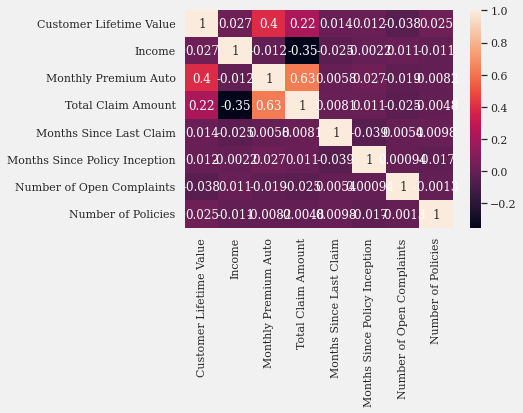

In [203]:
heatmap = df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto','Total Claim Amount','Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints','Number of Policies']]
import seaborn as sns
sns.heatmap(heatmap.corr(),annot=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

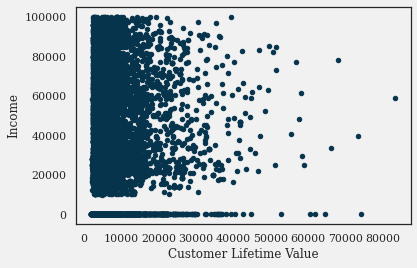

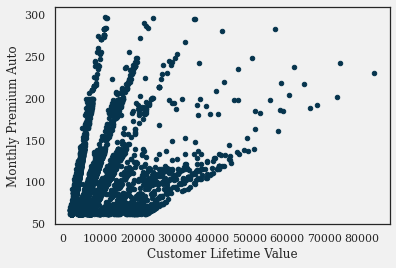

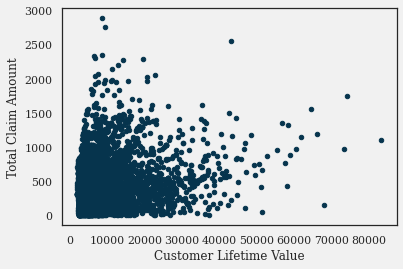

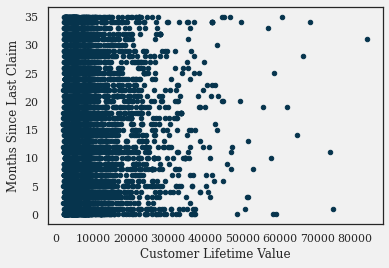

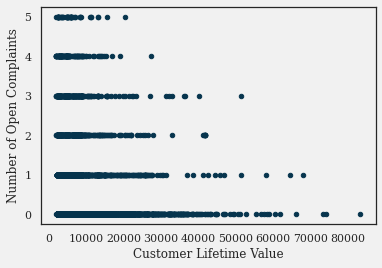

In [204]:
ax1 = df.plot.scatter(x='Customer Lifetime Value',y = 'Income')
ax2 = df.plot.scatter(x='Customer Lifetime Value',y = 'Monthly Premium Auto')
ax3 = df.plot.scatter(x='Customer Lifetime Value',y = 'Total Claim Amount')
ax4 = df.plot.scatter(x='Customer Lifetime Value',y = 'Months Since Last Claim')
ax5 = df.plot.scatter(x='Customer Lifetime Value',y = 'Number of Open Complaints')

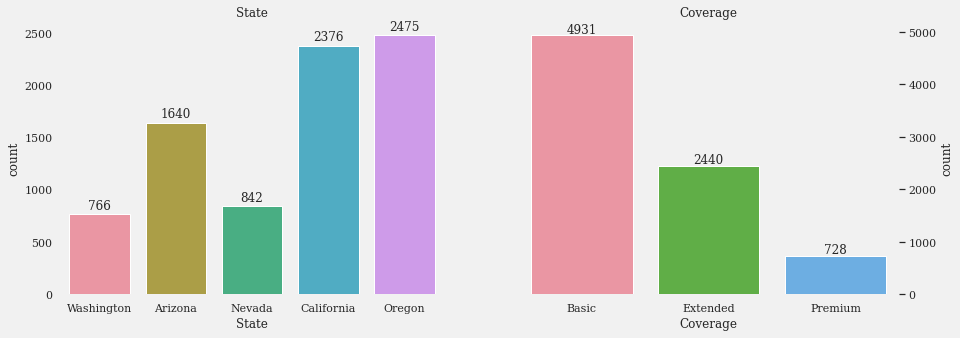

In [208]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(df["State"], ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
p2=sns.countplot(df["Coverage"], ax=axes[1])
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
sns.despine(bottom=True, left=True)
axes[0].set(title='State')
axes[1].set(title='Coverage')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()


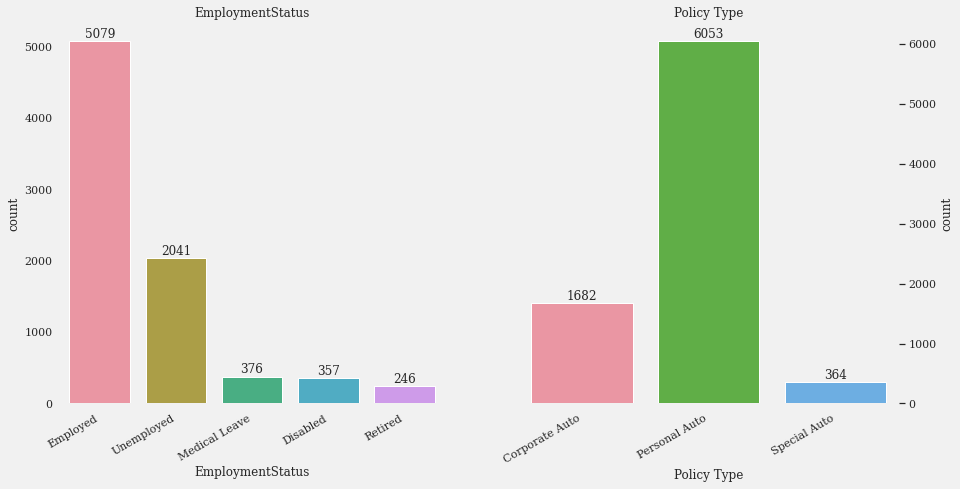

In [209]:
f, axes = plt.subplots(1, 2,figsize=(15,7))
p1=sns.countplot(df["EmploymentStatus"], ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
p2=sns.countplot(df["Policy Type"], ax=axes[1])
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
sns.despine(bottom=True, left=True)
axes[0].set(title='EmploymentStatus')
axes[1].set(title='Policy Type')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
for label in axes[0].get_xmajorticklabels() + axes[1].get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

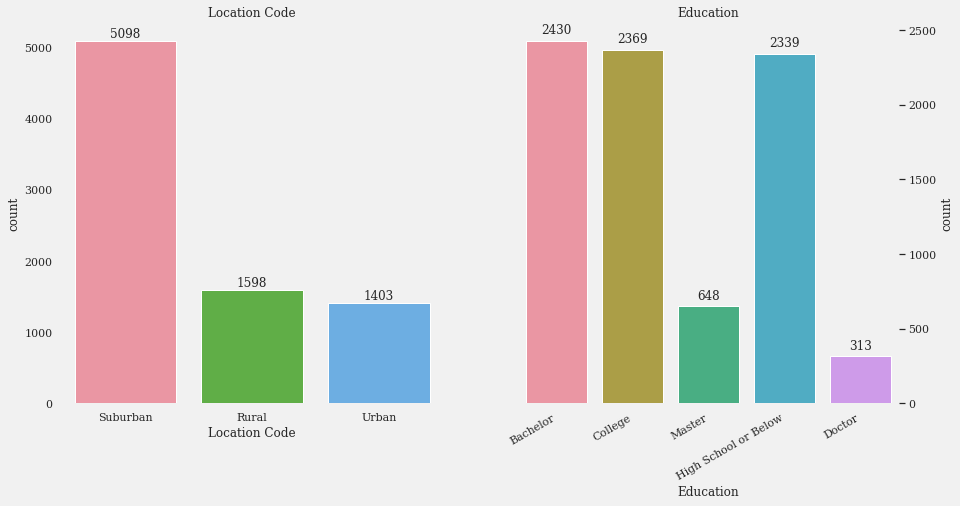

In [210]:
f, axes = plt.subplots(1, 2,figsize=(15,7))
p1=sns.countplot(df["Location Code"], ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
p2=sns.countplot(df["Education"], ax=axes[1])
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
sns.despine(bottom=True, left=True)
axes[0].set(title='Location Code')
axes[1].set(title='Education')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
for label in axes[1].get_xmajorticklabels() + axes[1].get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

In [ ]:
columns_to_keep = ['State', 'Education', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Vehicle Class', 'Vehicle Size','Customer Lifetime Value']
df_new = clean_data.loc[:,columns_to_keep]
df_new

,State,Education,EmploymentStatus,Gender,Location Code,Marital Status,Vehicle Class,Vehicle Size,Customer Lifetime Value
0,Washington,Bachelor,Employed,F,Suburban,Married,Two-Door Car,Medsize,2763.519279
1,Arizona,Bachelor,Unemployed,F,Suburban,Single,Four-Door Car,Medsize,6979.535903
2,Nevada,Bachelor,Employed,F,Suburban,Married,Two-Door Car,Medsize,12887.431650
3,California,Bachelor,Unemployed,M,Suburban,Married,SUV,Medsize,7645.861827
4,Washington,Bachelor,Employed,M,Rural,Single,Four-Door Car,Medsize,2813.692575
...,...,...,...,...,...,...,...,...,...
8094,Oregon,Master,Employed,F,Suburban,Married,Four-Door Car,Medsize,9726.551005
8095,California,Bachelor,Unemployed,F,Urban,Divorced,SUV,Medsize,8099.466122
8096,Oregon,College,Employed,M,Urban,Married,Four-Door Car,Medsize,5020.473987
8097,Arizona,College,Employed,F,Suburban,Divorced,Four-Door Car,Medsize,4834.710493


In [ ]:
cate = df_new.select_dtypes(include="object")
from sklearn.preprocessing import LabelEncoder
for col in cate:
    le = LabelEncoder()
    le.fit(cate[col])
    cate[col] = le.transform(cate[col])
numerical = df_new.select_dtypes(include=["int64","float64"])

In [ ]:
df_new = pd.concat([numerical,cate],axis=1)
df_new

,Customer Lifetime Value,State,Education,EmploymentStatus,Gender,Location Code,Marital Status,Vehicle Class,Vehicle Size
0,2763.519279,4,0,1,0,1,1,5,1
1,6979.535903,0,0,4,0,1,2,0,1
2,12887.431650,2,0,1,0,1,1,5,1
3,7645.861827,1,0,4,1,1,1,3,1
4,2813.692575,4,0,1,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...
8094,9726.551005,3,4,1,0,1,1,0,1
8095,8099.466122,1,0,4,0,2,0,3,1
8096,5020.473987,3,1,1,1,2,1,0,1
8097,4834.710493,0,1,1,0,1,0,0,1


# Baseline

In [ ]:
holdout = df_new.sample(frac=0.2, random_state=1)
training = df_new.drop(holdout.index)

In [ ]:

# Calculate the MSE of baseline model using the mean
from sklearn.metrics import mean_squared_error
mean_squared_error(pd.Series(training['Customer Lifetime Value'].mean()).repeat(holdout.shape[0]), holdout['Customer Lifetime Value'])


40279627.83876434

### create an empty dataframe and add square error to it

In [ ]:
my_df  = pd.DataFrame()


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(training.drop('Customer Lifetime Value',axis=1), training['Customer Lifetime Value'])
prediction = model.predict(holdout.drop('Customer Lifetime Value',axis=1))
mean_squared_error(model.predict(holdout.drop('Customer Lifetime Value',axis=1)), holdout['Customer Lifetime Value'])

39840349.910383664

In [ ]:
b = pow((model.predict(holdout.drop('Customer Lifetime Value',axis=1))-holdout['Customer Lifetime Value']),2)

my_df['linear regression']= b
b


3218    1.986824e+08
307     3.932711e+06
7892    7.247189e+07
5857    2.353980e+07
4836    8.119309e+06
            ...     
291     2.270055e+05
3604    1.252203e+07
2694    1.904540e+06
4423    2.082772e+07
4272    1.036984e+07
Name: Customer Lifetime Value, Length: 1620, dtype: float64

***predition models***
## Decision Tree Regression

Find the best depth of the tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kfold = KFold(n_splits=10, random_state=None, shuffle=False)
results = [] 
for depth in range(1,20,1):
    for training_i, testing_i in kfold.split(training):
        model = DecisionTreeRegressor(max_depth=depth)
        model.fit(training.iloc[training_i,:].drop('Customer Lifetime Value',axis=1), training.iloc[training_i,:]['Customer Lifetime Value'])
        mse = mean_squared_error(model.predict(training.iloc[testing_i,:].drop('Customer Lifetime Value',axis=1)), training.iloc[testing_i,:]['Customer Lifetime Value'])
        results.append({'depth':depth, 'mse':mse})
pd.DataFrame(results).groupby('depth').mean()

,mse
depth,
1,4.661756e+07
2,4.382318e+07
3,4.241619e+07
4,4.263296e+07
5,4.292770e+07
6,4.377072e+07
7,4.666058e+07
8,5.040879e+07
9,5.351970e+07


In [ ]:
best_depth = pd.DataFrame(results).set_index('depth')['mse'].idxmin()
best_depth

3

In [ ]:
model = DecisionTreeRegressor(max_depth=best_depth)
model.fit(training.drop('Customer Lifetime Value',axis=1), training['Customer Lifetime Value'])
mse = mean_squared_error(model.predict(holdout.drop('Customer Lifetime Value',axis=1)), holdout['Customer Lifetime Value'])
print (mse)

35573775.821031205


In [ ]:
c = pow((model.predict(holdout.drop('Customer Lifetime Value',axis=1))-holdout['Customer Lifetime Value']),2)
my_df['regression tree']= c
c

3218    2.141835e+08
307     1.167413e+05
7892    9.277979e+07
5857    1.691390e+07
4836    4.860797e+06
            ...     
291     3.526284e+05
3604    3.269232e+07
2694    1.029356e+08
4423    1.714101e+07
4272    3.343343e+07
Name: Customer Lifetime Value, Length: 1620, dtype: float64

In [ ]:
my_df


,linear regression,regression tree
3218,1.986824e+08,2.141835e+08
307,3.932711e+06,1.167413e+05
7892,7.247189e+07,9.277979e+07
5857,2.353980e+07,1.691390e+07
4836,8.119309e+06,4.860797e+06
...,...,...
291,2.270055e+05,3.526284e+05
3604,1.252203e+07,3.269232e+07
2694,1.904540e+06,1.029356e+08
4423,2.082772e+07,1.714101e+07


# using boxplot to compare linear regression and regression tree


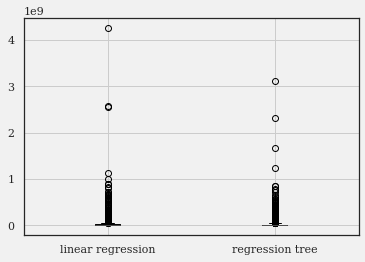

In [ ]:
boxplot = my_df.boxplot(column=['linear regression','regression tree'])

# Clustering (KMeans)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

columns_to_keep = ['State', 'Education', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Vehicle Class', 'Vehicle Size']
df = clean_data.loc[:,columns_to_keep]

# Scale values from 0 to 1
df_scaled = (df - df.min()) / (df.max() - df.min())

# Try various values of k
sil_scores = []
for k in range(3,15):
    clusterer = KMeans(n_clusters=k)
    clusterer.fit(df_scaled)
    label = clusterer.predict(df_scaled)
    sil_scores.append({'k':k, 'silhouette_score':silhouette_score(df_scaled, label), 'label':label})
sil_scores = pd.DataFrame(sil_scores)
sil_scores

TypeError: ignored

In [ ]:
# Select best labels (based on silhouette score)
best_label = sil_scores.loc[sil_scores['silhouette_score'].idxmax(),'label']
print('Best Label:', best_label)

In [ ]:
# Present some summary statistics for each clusters
df.groupby(best_label).mean()

add decision tree to extract features?